# Forecast of Total Sales

In [1]:
import os
while os.getcwd().endswith('/notebooks'):
    os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import shap
from src.preprocessing import preprocess
from src.utils import train_val_test_split, read_yaml
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from tqdm import tqdm

In [4]:
data_path = 'data/base_estudo.csv'
cfg_path = 'cfg.yaml'
df = pd.read_csv(data_path, index_col=0)
df = preprocess(df, cfg_path)
total_sales = df['n_pedidos'].groupby('data').sum()
cfg = read_yaml(cfg_path)
train_size=cfg['train_val_test_split']['train_size']
val_size=cfg['train_val_test_split']['val_size']
test_size=cfg['train_val_test_split']['test_size']
total_sales_split = train_val_test_split(
    total_sales,
    train_size=train_size,
    val_size=val_size,
    test_size=test_size,
)

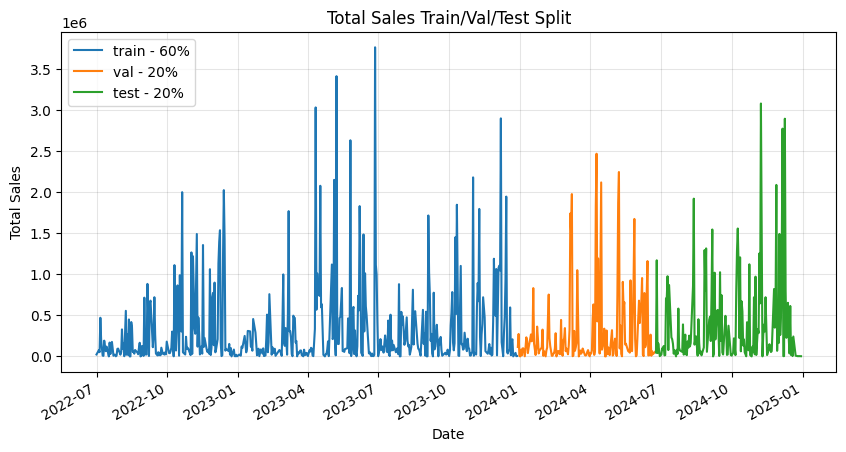

In [5]:
plt.figure(figsize=(10, 5))
total_sales_split['train'].plot(label=f'train - {train_size*100:.0f}%')
total_sales_split['val'].plot(label=f'val - {val_size*100:.0f}%')
total_sales_split['test'].plot(label=f'test - {test_size*100:.0f}%')
plt.legend()
plt.title('Total Sales Train/Val/Test Split')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(c='k', alpha=0.1)
plt.show()

## ARIMA

In [6]:
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)
param_grid = list(itertools.product(p_values, d_values, q_values))

best_aic = float("inf")
best_order = None
best_model = None

for p, d, q in param_grid:
    if p == 0 and q == 0:
        continue
    print(f"Trying ARIMA({p}, {d}, {q})")
    model = ARIMA(total_sales_split['train'].values, order=(p, 0, q))
    results = model.fit()
    if results.aic < best_aic:
        best_aic = results.aic
        best_order = (p, 0, q)
        best_model = results

print(f"Best ARIMA Order: {best_order} with AIC={best_aic}")

Trying ARIMA(0, 0, 1)
Trying ARIMA(0, 0, 2)
Trying ARIMA(0, 0, 3)
Trying ARIMA(0, 0, 4)
Trying ARIMA(0, 0, 5)
Trying ARIMA(0, 1, 1)
Trying ARIMA(0, 1, 2)
Trying ARIMA(0, 1, 3)
Trying ARIMA(0, 1, 4)
Trying ARIMA(0, 1, 5)
Trying ARIMA(1, 0, 0)
Trying ARIMA(1, 0, 1)
Trying ARIMA(1, 0, 2)
Trying ARIMA(1, 0, 3)
Trying ARIMA(1, 0, 4)
Trying ARIMA(1, 0, 5)
Trying ARIMA(1, 1, 0)
Trying ARIMA(1, 1, 1)
Trying ARIMA(1, 1, 2)
Trying ARIMA(1, 1, 3)
Trying ARIMA(1, 1, 4)
Trying ARIMA(1, 1, 5)
Trying ARIMA(2, 0, 0)
Trying ARIMA(2, 0, 1)
Trying ARIMA(2, 0, 2)


/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trying ARIMA(2, 0, 3)
Trying ARIMA(2, 0, 4)
Trying ARIMA(2, 0, 5)
Trying ARIMA(2, 1, 0)
Trying ARIMA(2, 1, 1)
Trying ARIMA(2, 1, 2)
Trying ARIMA(2, 1, 3)
Trying ARIMA(2, 1, 4)
Trying ARIMA(2, 1, 5)
Trying ARIMA(3, 0, 0)
Trying ARIMA(3, 0, 1)
Trying ARIMA(3, 0, 2)
Trying ARIMA(3, 0, 3)


/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying ARIMA(3, 0, 4)
Trying ARIMA(3, 0, 5)
Trying ARIMA(3, 1, 0)
Trying ARIMA(3, 1, 1)
Trying ARIMA(3, 1, 2)
Trying ARIMA(3, 1, 3)


/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying ARIMA(3, 1, 4)
Trying ARIMA(3, 1, 5)
Trying ARIMA(4, 0, 0)
Trying ARIMA(4, 0, 1)
Trying ARIMA(4, 0, 2)
Trying ARIMA(4, 0, 3)


/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying ARIMA(4, 0, 4)
Trying ARIMA(4, 0, 5)
Trying ARIMA(4, 1, 0)
Trying ARIMA(4, 1, 1)
Trying ARIMA(4, 1, 2)
Trying ARIMA(4, 1, 3)


/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying ARIMA(4, 1, 4)
Trying ARIMA(4, 1, 5)
Trying ARIMA(5, 0, 0)
Trying ARIMA(5, 0, 1)
Trying ARIMA(5, 0, 2)
Trying ARIMA(5, 0, 3)


/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying ARIMA(5, 0, 4)
Trying ARIMA(5, 0, 5)


/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying ARIMA(5, 1, 0)
Trying ARIMA(5, 1, 1)
Trying ARIMA(5, 1, 2)
Trying ARIMA(5, 1, 3)


/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying ARIMA(5, 1, 4)
Trying ARIMA(5, 1, 5)
Best ARIMA Order: (5, 0, 2) with AIC=13456.983633520911


/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
best_order

(5, 0, 2)

In [8]:
best_arima_model = ARIMA(total_sales_split['train'].values, order=best_order)
best_arima_model_fit = best_arima_model.fit()
best_arima_model_fit.summary()

/opt/anaconda3/envs/a3_desafio_2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  463
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -6719.492
Date:                Sun, 30 Mar 2025   AIC                          13456.984
Time:                        12:34:37   BIC                          13494.223
Sample:                             0   HQIC                         13471.644
                                - 463                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.146e+05   4.65e+04      6.759      0.000    2.23e+05    4.06e+05
ar.L1          1.1633      0.058     19.924      0.000       1.049       1.278
ar.L2         -1.0455      0.092    -11.324      0.000      -1.226      -0.865
ar.L3          0.2147      0.095      2.266      0.023       0.029       0.400
ar.L4         -0.0988      0.073     -1.359      0.174      -0.241       0.044
ar.L5          0.1699      0.043      3.963      0.000       0.086       0.254
ma.L1         -1.0230      0.025    -40.629      0.000      -1.072      -0.974
ma.L2          0.9644      0.025     38.178      0.000       0.915       1.014
sigma2      2.444e+11      0.187   1.31e+12      0.000    2.44e+11    2.44e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3899.33
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             3.05
Prob(H) (two-sided):                  0.18   Kurtosis:                        15.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+26. Standard errors may be unstable.
"""

In [9]:
# best_arima_model_fit.plot_diagnostics(figsize=(20, 10))
# plt.show()

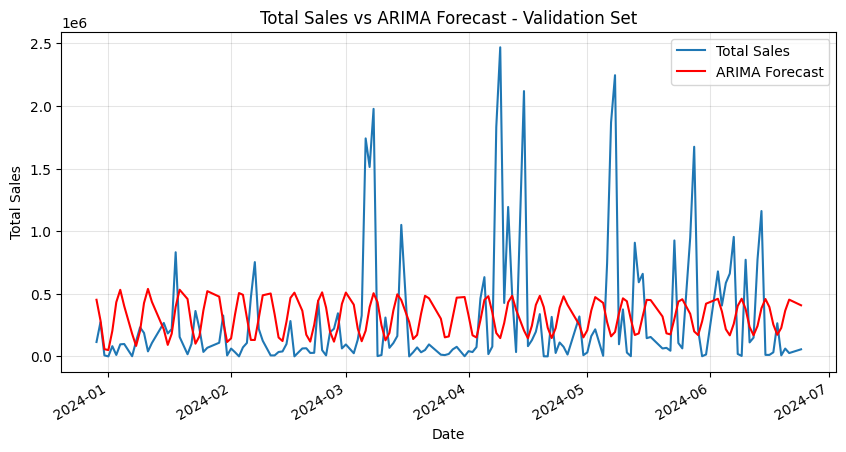

In [10]:
arima_forecast = best_arima_model_fit.forecast(steps=total_sales_split['val'].shape[0])
arima_forecast = pd.Series(arima_forecast, index=total_sales_split['val'].index)
plt.figure(figsize=(10, 5))
total_sales_split['val'].plot(label='Total Sales')
arima_forecast.plot(label='ARIMA Forecast', color='red')
plt.legend()
plt.title('Total Sales vs ARIMA Forecast - Validation Set')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(c='k', alpha=0.1)
plt.show()

In [11]:
print('ARIMA Model Evaluation - Validation Set:')
print(f"RMSE: {root_mean_squared_error(total_sales_split['val'].values, arima_forecast.values):.2f}")
print(f"MAE: {mean_absolute_error(total_sales_split['val'].values, arima_forecast.values):.2f}")
print(f"R2: {r2_score(total_sales_split['val'].values, arima_forecast.values):.2f}")

ARIMA Model Evaluation - Validation Set:
RMSE: 521910.61
MAE: 357976.56
R2: -0.15


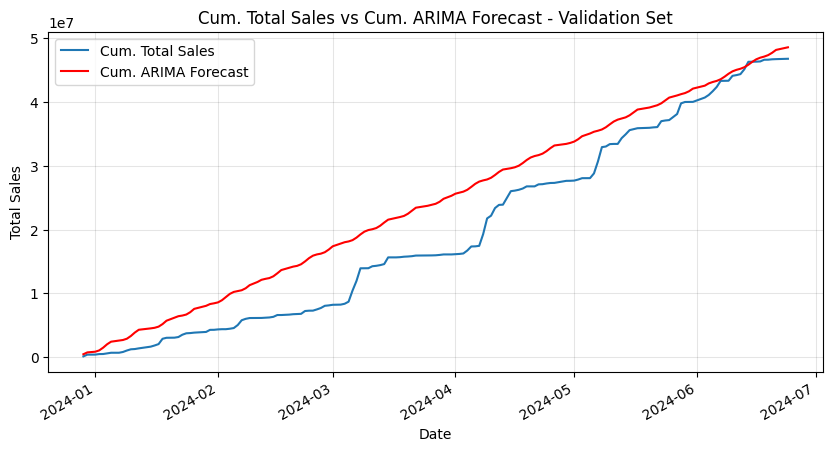

In [12]:
arima_forecast = best_arima_model_fit.forecast(steps=total_sales_split['val'].shape[0])
arima_forecast = pd.Series(arima_forecast, index=total_sales_split['val'].index)
plt.figure(figsize=(10, 5))
total_sales_split['val'].cumsum().plot(label='Cum. Total Sales')
arima_forecast.cumsum().plot(label='Cum. ARIMA Forecast', color='red')
plt.legend()
plt.title('Cum. Total Sales vs Cum. ARIMA Forecast - Validation Set')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(c='k', alpha=0.1)
plt.show()

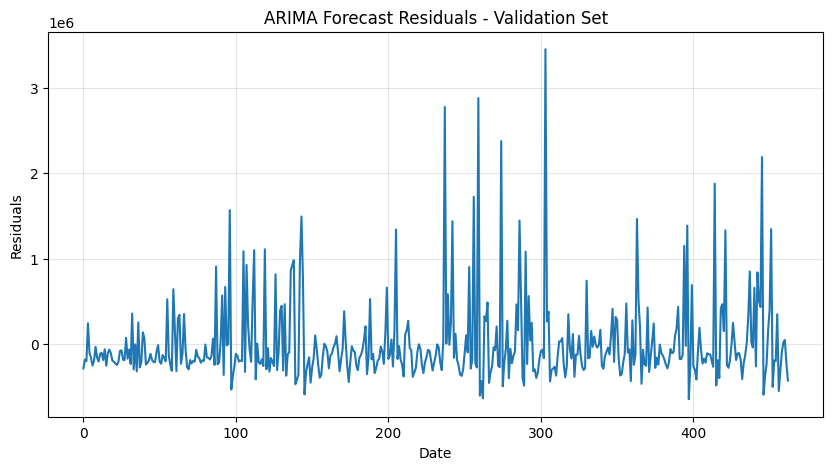

In [13]:
residuals = best_arima_model_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('ARIMA Forecast Residuals - Validation Set')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(c='k', alpha=0.1)
plt.show()

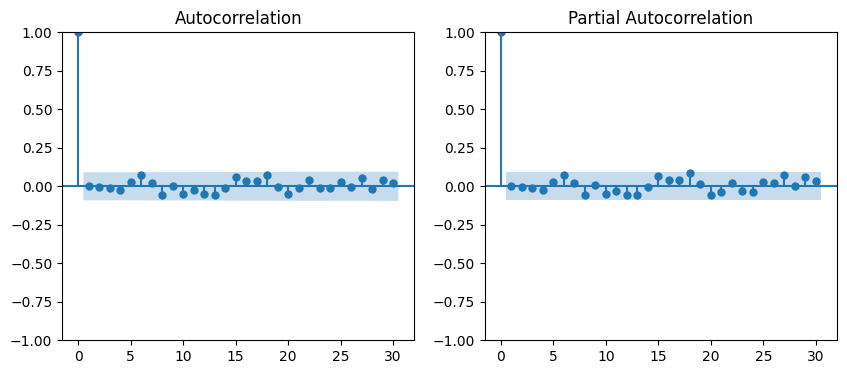

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10, 4))
plot_acf(residuals, lags=30, ax=plt.subplot(121))
plot_pacf(residuals, lags=30, ax=plt.subplot(122))
plt.show()

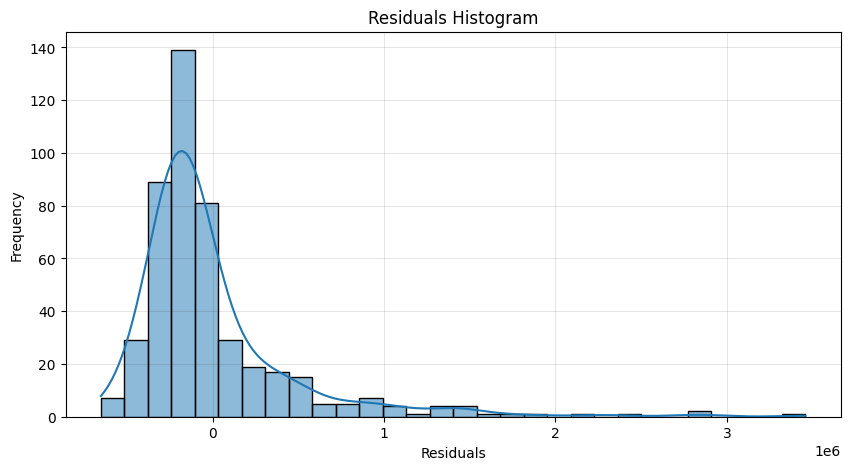

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(c='k', alpha=0.1)
plt.show()

In [16]:
shapiro_test = shapiro(residuals)
shapiro_test_statistic = shapiro_test.statistic
shapiro_test_p_value = shapiro_test.pvalue
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic}")
print(f"Shapiro-Wilk Test p-value: {shapiro_test_p_value}")

Shapiro-Wilk Test Statistic: 0.7004929954286261
Shapiro-Wilk Test p-value: 6.881214314041258e-28


## Random Forest

In [17]:
X_train = total_sales_split['train'].shift(range(1, 6))
X_train['day_of_week'] = X_train.index.dayofweek
X_train['day_of_month'] = X_train.index.day
X_train['day_of_year'] = X_train.index.dayofyear
X_train = X_train.dropna()
X_train

,n_pedidos_1,n_pedidos_2,n_pedidos_3,n_pedidos_4,n_pedidos_5,day_of_week,day_of_month,day_of_year
data,,,,,,,,
2022-07-08,202776.0,470685.0,51483.0,74533.0,23414.0,4,8,189
2022-07-09,97656.0,202776.0,470685.0,51483.0,74533.0,5,9,190
2022-07-10,9684.0,97656.0,202776.0,470685.0,51483.0,6,10,191
2022-07-11,6404.0,9684.0,97656.0,202776.0,470685.0,0,11,192
2022-07-12,191752.0,6404.0,9684.0,97656.0,202776.0,1,12,193
...,...,...,...,...,...,...,...,...
2023-12-22,183306.0,14464.0,596630.0,88196.0,35320.0,4,22,356
2023-12-23,208542.0,183306.0,14464.0,596630.0,88196.0,5,23,357
2023-12-26,324.0,208542.0,183306.0,14464.0,596630.0,1,26,360


In [18]:
y_train = total_sales_split['train'].reindex(X_train.index)
y_train

data
2022-07-08     97656.0
2022-07-09      9684.0
2022-07-10      6404.0
2022-07-11    191752.0
2022-07-12    121162.0
                ...   
2023-12-22    208542.0
2023-12-23       324.0
2023-12-26     42600.0
2023-12-27      2980.0
2023-12-28      4394.0
Name: n_pedidos, Length: 458, dtype: float64

In [19]:
X_val = total_sales_split['val'].shift(range(1, 6))
X_val['day_of_week'] = X_val.index.dayofweek
X_val['day_of_month'] = X_val.index.day
X_val['day_of_year'] = X_val.index.dayofyear
X_val = X_val.dropna()

y_val = total_sales_split['val'].reindex(X_val.index)

In [20]:
param_grid = [
    {
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'random_state': cfg['random_state'],
    }
    for n_estimators in [50, 100, 200]
    for max_depth in [10, None]
    for min_samples_split in [2, 5]
    for min_samples_leaf in [1, 2]
]
len(param_grid)

24

In [21]:
rfr_results = []
best_rfr_r2 = -float('inf')
for params in tqdm(param_grid):
    rfr = RandomForestRegressor(**params)
    rfr.fit(X_train.values, y_train.values)
    y_val_pred = rfr.predict(X_val.values)
    mae = mean_absolute_error(y_val.values, y_val_pred)
    rmse = root_mean_squared_error(y_val.values, y_val_pred)
    r2 = r2_score(y_val.values, y_val_pred)
    if best_rfr_r2 < r2:
        best_rfr_r2 = r2
        best_params = params
        best_rfr_model = rfr
    rfr_results.append({
        **params,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
    })
rfr_results_df = pd.DataFrame(rfr_results)

100%|██████████| 24/24 [00:03<00:00,  7.44it/s]


In [22]:
best_rfr_r2

0.11428906075196965

In [23]:
best_params

{'n_estimators': 200,
 'max_depth': None,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'random_state': 0}

In [24]:
rfr_results_df.sort_values('r2')

,n_estimators,max_depth,min_samples_split,min_samples_leaf,random_state,mae,rmse,r2
4,50,NaN,2,1,0,304426.758267,476180.710634,0.067898
14,100,NaN,5,1,0,306626.678062,475256.357635,0.071513
0,50,10.0,2,1,0,301546.877072,474916.519614,0.072841
6,50,NaN,5,1,0,305138.881912,474868.981731,0.073026
2,50,10.0,5,1,0,304286.690721,474705.331676,0.073665
12,100,NaN,2,1,0,304771.573667,473477.775868,0.078450
10,100,10.0,5,1,0,302390.959579,472451.360786,0.082441
11,100,10.0,5,2,0,303220.613771,470565.872635,0.089750
22,200,NaN,5,1,0,302884.843396,470451.675261,0.090192
8,100,10.0,2,1,0,299502.295069,470295.660339,0.090795


In [25]:
X_val

,n_pedidos_1,n_pedidos_2,n_pedidos_3,n_pedidos_4,n_pedidos_5,day_of_week,day_of_month,day_of_year
data,,,,,,,,
2024-01-03,81700.0,96.0,7942.0,273143.0,115008.0,2,3,3
2024-01-04,11604.0,81700.0,96.0,7942.0,273143.0,3,4,4
2024-01-05,96380.0,11604.0,81700.0,96.0,7942.0,4,5,5
2024-01-07,99016.0,96380.0,11604.0,81700.0,96.0,6,7,7
2024-01-08,1392.0,99016.0,96380.0,11604.0,81700.0,0,8,8
...,...,...,...,...,...,...,...,...
2024-06-18,32548.0,11868.0,12108.0,1161350.0,774104.0,1,18,170
2024-06-19,264848.0,32548.0,11868.0,12108.0,1161350.0,2,19,171
2024-06-20,8184.0,264848.0,32548.0,11868.0,12108.0,3,20,172


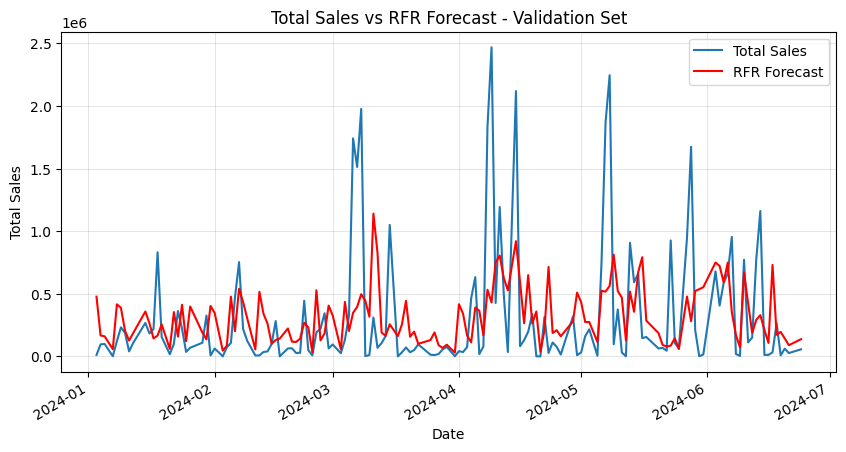

In [26]:
y_val_pred = best_rfr_model.predict(X_val.values)
y_val_pred = pd.Series(y_val_pred, index=y_val.index)
plt.figure(figsize=(10, 5))
total_sales_split['val'].reindex(y_val.index).plot(label='Total Sales')
y_val_pred.plot(label='RFR Forecast', color='red')
plt.legend()
plt.title('Total Sales vs RFR Forecast - Validation Set')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(c='k', alpha=0.1)
plt.show()

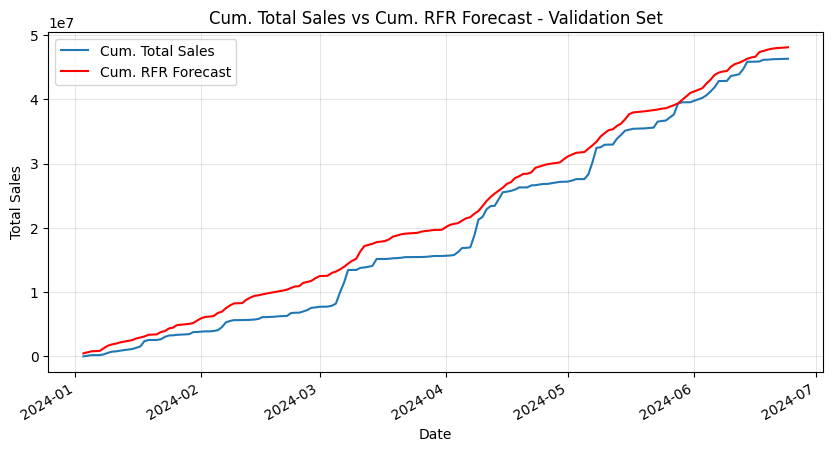

In [27]:
plt.figure(figsize=(10, 5))
total_sales_split['val'].reindex(y_val.index).cumsum().plot(label='Cum. Total Sales')
y_val_pred.cumsum().plot(label='Cum. RFR Forecast', color='red')
plt.legend()
plt.title('Cum. Total Sales vs Cum. RFR Forecast - Validation Set')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(c='k', alpha=0.1)
plt.show()

In [28]:
X_test = total_sales_split['test'].shift(range(1, 6))
X_test['day_of_week'] = X_test.index.dayofweek
X_test['day_of_month'] = X_test.index.day
X_test['day_of_year'] = X_test.index.dayofyear
X_test = X_test.dropna()

y_test = total_sales_split['test'].reindex(X_test.index)

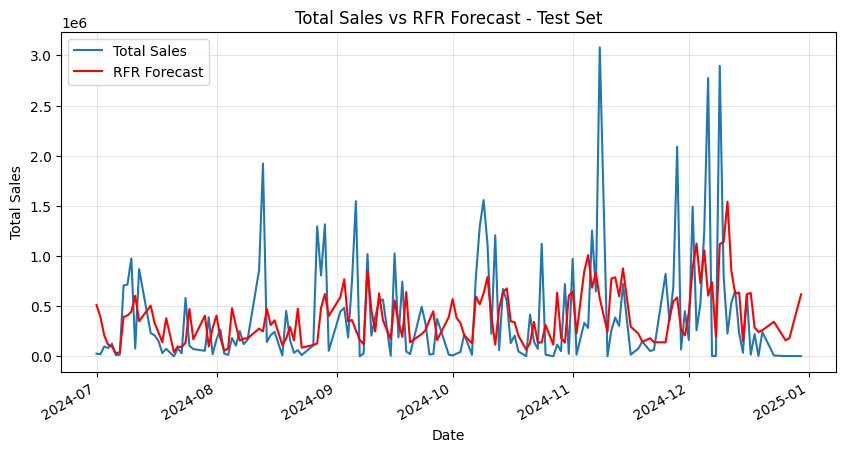

RFR Model Evaluation - Test Set:
RMSE: 525894.89
MAE: 348851.76
R2: 0.12


In [29]:
y_test_pred = best_rfr_model.predict(X_test.values)
y_test_pred = pd.Series(y_test_pred, index=y_test.index)
plt.figure(figsize=(10, 5))
total_sales_split['test'].reindex(y_test.index).plot(label='Total Sales')
y_test_pred.plot(label='RFR Forecast', color='red')
plt.legend()
plt.title('Total Sales vs RFR Forecast - Test Set')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(c='k', alpha=0.1)
plt.show()

print('RFR Model Evaluation - Test Set:')
print(f"RMSE: {root_mean_squared_error(y_test.values, y_test_pred.values):.2f}")
print(f"MAE: {mean_absolute_error(y_test.values, y_test_pred.values):.2f}")
print(f"R2: {r2_score(y_test.values, y_test_pred.values):.2f}")

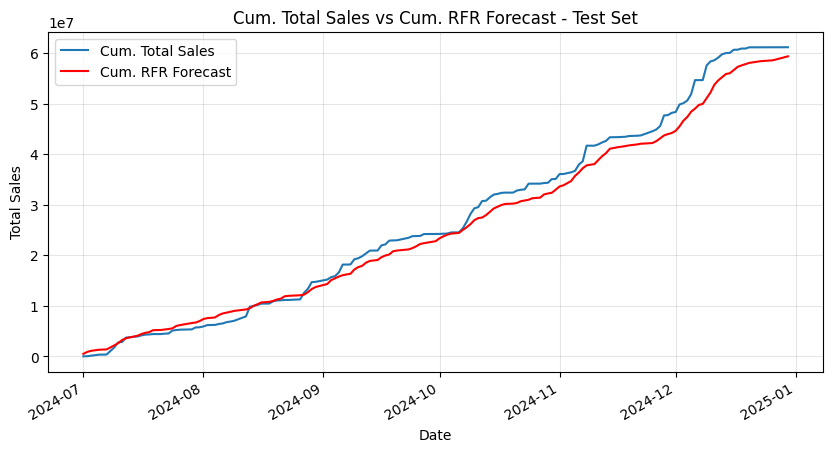

In [30]:
plt.figure(figsize=(10, 5))
total_sales_split['test'].reindex(y_test.index).cumsum().plot(label='Cum. Total Sales')
y_test_pred.cumsum().plot(label='Cum. RFR Forecast', color='red')
plt.legend()
plt.title('Cum. Total Sales vs Cum. RFR Forecast - Test Set')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(c='k', alpha=0.1)
plt.show()

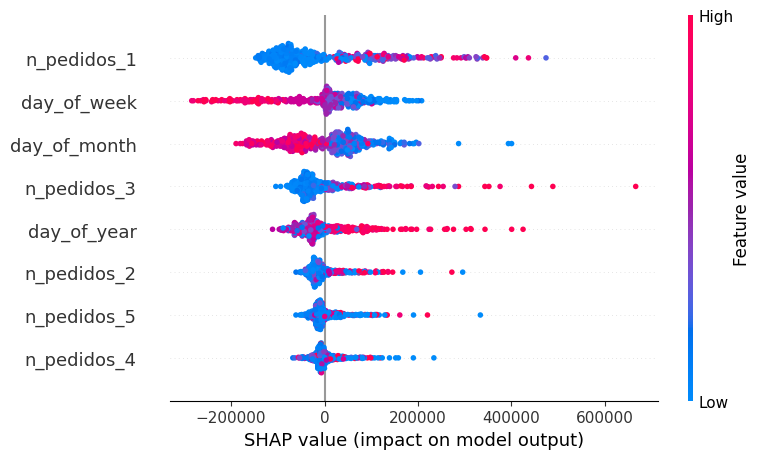

In [31]:
explainer = shap.TreeExplainer(best_rfr_model)
shap_values = explainer.shap_values(X_train.values)
shap.summary_plot(shap_values, X_train.values, feature_names=X_train.columns)

In [32]:
X_train['day_of_week'].value_counts()

day_of_week
4    77
1    76
3    76
2    75
0    74
5    41
6    39
Name: count, dtype: int64

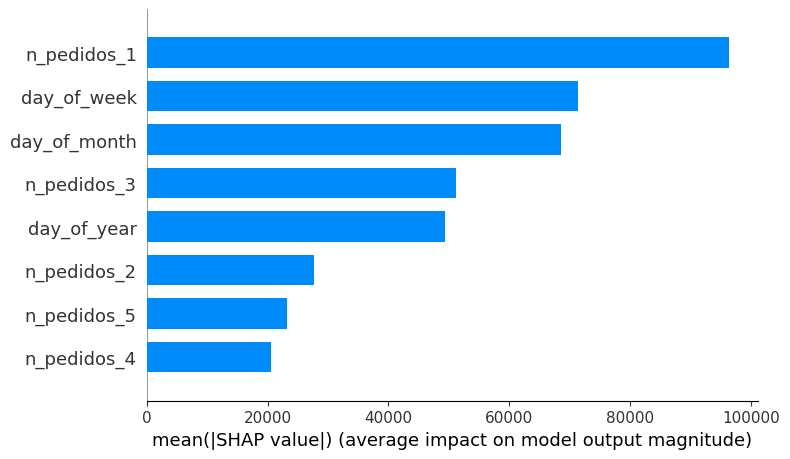

In [33]:
shap.summary_plot(shap_values, X_train.values, feature_names=X_train.columns, plot_type="bar")